In [6]:
import meshmode.mesh.generation as mgen
import numpy as np
import sympy as sp
from meshmode import _acf as _acf_meshmode
from meshmode.discretization import Discretization
from meshmode.discretization.poly_element import (
    default_simplex_group_factory,
)
from pytential import bind, sym
from sympy import hankel1

from sumpy.array_context import _acf
from sumpy.expansion.diff_op import (
    laplacian,
    make_identity_diff_op,
)
from sumpy.expansion.local import LineTaylorLocalExpansion
from sumpy.kernel import HelmholtzKernel, LaplaceKernel
from sumpy.qbx import LayerPotential
from sumpy.recurrenceqbx import _make_sympy_vec, recurrence_qbx_lp

In [48]:
target_order = 4

actx_m = _acf_meshmode()
mesh = mgen.generate_sphere(1.0, target_order,
    uniform_refinement_rounds=1)
grp_factory = default_simplex_group_factory(3, target_order)
discr = Discretization(actx_m, mesh, grp_factory)
nodes = actx_m.to_numpy(discr.nodes())
sources = np.array([nodes[0][0].reshape(-1),nodes[1][0].reshape(-1),nodes[2][0].reshape(-1)])

area_weight_a = bind(discr, sym.QWeight()*sym.area_element(3))(actx_m)
area_weight = actx_m.to_numpy(area_weight_a)[0]
strengths = area_weight.reshape(-1)

normals_a = bind(discr, sym.normal(3))(actx_m).as_vector(dtype=object)
normals_a = actx_m.to_numpy(normals_a)
normals = np.array([normals_a[0][0].reshape(-1), normals_a[1][0].reshape(-1), normals_a[2][0].reshape(-1)])

radius = 0.01
centers = sources - radius * normals

/Users/hirish/source/src/meshmode/meshmode/mesh/__init__.py:1086: UserWarning: Unimplemented: Cannot check element orientation for a mesh with mesh.dim != mesh.ambient_dim
  check_mesh_consistency(


In [53]:
strengths.shape

(1200,)

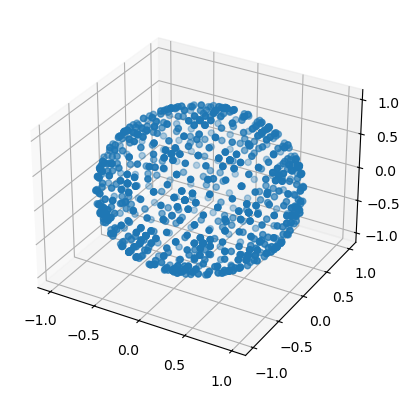

In [54]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(sources[0], sources[1], sources[2])